In [56]:
import numpy as np
import pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt
%matplotlib inline

跨式期权组合

In [15]:
S = range(100)
#看涨期权
k_call = 50
p_call = 10

#看跌期权
k_put = 50
p_put = 9

option_value = pd.DataFrame(columns = ['S' , 'call_price' , 'put_price' , 'straddle_price'])
option_value['S'] = S

In [27]:
#卖出看涨期权损益
for s in S:
    
    if s < k_call :
        option_value['call_price'][s] = p_call
    elif s == k_call:
        option_value['call_price'][s] = p_call
        
    else :
        option_value['call_price'][s] = p_call + k_call - s 

    

<ipython-input-27-47c5ffe6579e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  option_value['call_price'][s] = p_call
<ipython-input-27-47c5ffe6579e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  option_value['call_price'][s] = p_call
<ipython-input-27-47c5ffe6579e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  option_value['call_price'][s] = p_call + k_call - s


In [28]:
#卖出看跌期权损益
for s in S:
    
    if s < k_call :
        option_value['put_price'][s] = s + p_put - k_put
    
    elif s == k_call:
        option_value['put_price'][s] = s + p_put - k_put
        
    else :
        option_value['put_price'][s] = p_put

<ipython-input-28-f359ff333336>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  option_value['put_price'][s] = s + p_put - k_put
<ipython-input-28-f359ff333336>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  option_value['put_price'][s] = s + p_put - k_put
<ipython-input-28-f359ff333336>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  option_value['put_price'][s] = p_put


In [62]:
#跨式组合损益
option_value['straddle_price'] = option_value['call_price'] + option_value['put_price']

Text(0.5, 1.0, 'Straddle')

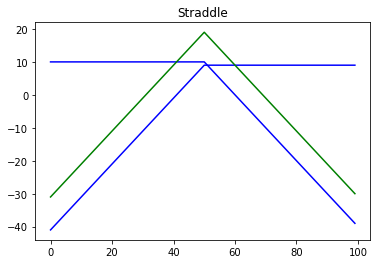

In [65]:
option_value['call_price'].plot(c = 'b')
option_value['put_price'].plot(c = 'b')
option_value['straddle_price'].plot(c = 'g')
plt.title('Straddle')

In [41]:
#备兑卖出看涨期权
k1 = 53
call_price1 = 10

In [44]:
option_value['call_price1'] = 0
for s in S:
    if s < k1 :
        option_value['call_price1'][s] = call_price1
    elif s == k1:
        option_value['call_price1'][s] = call_price1
        
    else :
        option_value['call_price1'][s] = call_price1 + k1 - s 

<ipython-input-44-912ab13b8327>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  option_value['call_price1'][s] = call_price1
<ipython-input-44-912ab13b8327>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  option_value['call_price1'][s] = call_price1
<ipython-input-44-912ab13b8327>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  option_value['call_price1'][s] = call_price1 + k1 - s


In [50]:
option_value['S1'] = option_value['S'] - 50
option_value['covered_call'] = option_value['call_price1']+ option_value['S1']

Text(0.5, 1.0, 'Covered Call')

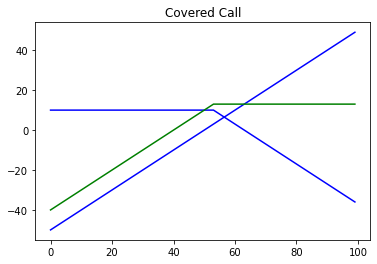

In [64]:
option_value['call_price1'].plot(c = 'b')
option_value['S1'].plot(c = 'b')
option_value['covered_call'].plot(c = 'g')
plt.title('Covered Call')